Depth first search class participation assignment

Target node has adjacent nodes:
[4, 5, 8]


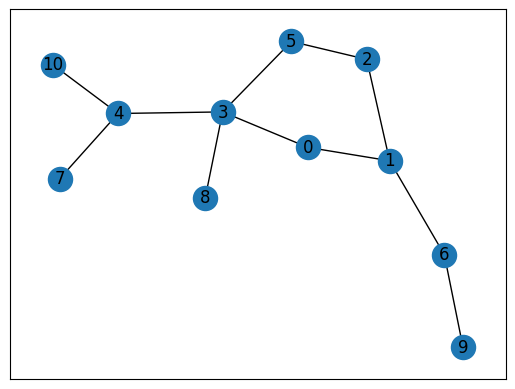


0 ->  1 ->  3
1 ->  2 ->  6
2 ->  5
3 ->  4 ->  5 ->  8
4 ->  7 ->  10
5
6 ->  9
7
8
9
10
{0: [1, 3], 1: [2, 6], 2: [5], 3: [4, 5, 8], 4: [7, 10], 5: [], 6: [9], 7: [], 8: [], 9: [], 10: []}
0.0
[[0, [1, 3]], [1, [2, 6]], [2, [5]], [3, [4, 5, 8]], [4, [7, 10]], [5, []], [6, [9]], [7, []], [8, []], [9, []], [10, []]]
1
deque([])
deque([1, 3])
2
deque([1])
deque([1, 4, 5, 8])
3
deque([1, 4, 5])
2
deque([1, 4])
1
deque([1])
deque([1, 7, 10])
2
deque([1, 7])
target value found at depth of  3


In [9]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import deque

class GraphWithPlot:
    """creates graph"""

    def __init__(self):
        self.all_nodes = {}
        self.node_list = []
        self.node_matrix = np.zeros(())
        self.stack = deque()

    def addNode(self, new_node, adj_nodes):
        self.all_nodes[new_node] = adj_nodes

        self.adj_list = []
        self.adj_list.append(new_node)
        self.adj_list.append(list(adj_nodes))
        self.node_list.append(self.adj_list)

    def getAdjNodes(self, target_node):
        return self.all_nodes[target_node]

    def plotSingleNode(self, target_node):
        if not self.checkNodeExistHelper(target_node):
            print("Node is not in current graph!")
            return
        if not self.all_nodes[target_node]:
            print("Node has no adjacent node")
            G = nx.Graph()
            G.add_edges_from(target_node)
        curr_node_edges = []
        for curr_adj_node in self.all_nodes[target_node]:
            curr_node_edges.append([target_node, curr_adj_node])
        G = nx.Graph()
        G.add_edges_from(curr_node_edges)
        nx.draw_networkx(G)
        plt.show()

    def plotGraph(self):
        G = nx.Graph()
        G.add_edges_from(self.getAllEdgesHelper())
        nx.draw_networkx(G)
        plt.show()

    def plotAsDirectedGraph(self):
        G = nx.DiGraph()
        G.add_edges_from(self.getAllEdgesHelper())
        nx.draw_networkx(G)
        plt.show()

    def checkNodeExistHelper(self, target_key) -> bool:
        if target_key in self.all_nodes:
            return True
        return False

    def getAllEdgesHelper(self):
        all_node_edges = []
        for curr_node in self.all_nodes:
            curr_node_edges = []
            if self.all_nodes[curr_node] != None:
                for curr_adj_node in self.all_nodes[curr_node]:
                    curr_node_edges.append([curr_node, curr_adj_node])
                all_node_edges.extend(curr_node_edges)
        return all_node_edges

    def createList(self, new_matrix):
        self.node_matrix = new_matrix
        self.conMatrixToList()

    def conMatrixToList(self):
        length_list = len(new_matrix)
        self.node_list = [range(length_list)]
        for i in range(length_list):
            for j in range(len(new_matrix[i])):
                if (new_matrix[i][j] == 1):
                    self.node_list[i].append[j]

    def createMatrix(self, new_list):
        self.node_list = new_list
        self.conListToMatrix()

    def conListToMatrix(self):
        length_of = len(self.node_list)
        self.node_matrix = np.zeros((length_of, length_of))
        for i in range(length_of):
            if (len(self.node_list[i][1])) != 0:
                for j in range(len(self.node_list[i][1])):
                    self.node_matrix[i][self.node_list[i][j]] = 1

    def depthSearch(self, target_value, current_value, depth):
        self.printIterDepth(depth)
        if target_value == current_value:
            print("target value found at depth of ", str(depth+1))
            return
        elif len(self.node_list[current_value][1]) == 0:
            self.depthSearch(target_value, self.stack.pop(), depth-1)
        else:
            for each in self.node_list[current_value][1]:
                self.stack.append(each)
            print(self.stack)
            self.depthSearch(target_value, self.stack.pop(), depth+1)

    def printIterDepth(self, depth):
        print(depth)
        print(self.stack)

    def printDict(self):
        print(str(self.all_nodes))

    def printList(self):
        print(self.node_list)

    def printMatrix(self):
        print(str(self.node_matrix))

    def printAdjList(self):
        for each in self.node_list:
            print()
            print(str(each[0]), end="")
            if (isinstance(each[1], int)):
                print(" -> ", str(each[1]), end="")
            elif (each[1] != None):
                for item in each[1]:
                    print(" -> ", str(item), end="")
        print()

G = GraphWithPlot()
G.addNode(0, [1, 3])
G.addNode(1, [2, 6])
G.addNode(2, [5])
G.addNode(3, [4, 5, 8])
G.addNode(4, [7, 10])
G.addNode(5, [])
G.addNode(6, [9])
G.addNode(7, [])
G.addNode(8, [])
G.addNode(9, [])
G.addNode(10, [])

print("Target node has adjacent nodes:")
print(G.getAdjNodes(3))
G.plotGraph()

G.printAdjList()
G.printDict()
G.printMatrix()
G.printList()

G.depthSearch(10, 0, 1)